# Deep Video Analytics tutorial

### Please run this notebook on Host OS or google cloud shell with dvactl configured & DVA running

##### Make sure following modules can be imported succcessfully by running 
`pip install --upgrade requests pillow`

In [1]:
import os, requests, sys, json, jsonschema
from PIL import Image as PImage
from IPython.display import Image, display

### This tutorial uses REST API endpoint through DVA python client

In [2]:
sys.path.append('client/') #add DVA client to python path 

In [3]:
import dvaclient
import logging, json

## Using Deep Video Analytics python client

####  REST API token generated by `dvactl start`  is stored in creds.json it can also be found at /security page in DVA UI

In [4]:
creds = json.load(file('creds.json'))
server, token = creds['server'], creds['token']
ctx = dvaclient.context.DVAContext(server=server,token=token)

## REST API vs DVAPQL

Deep Video Analytics uses REST API (GET, LIST, but **NOT POST**) for exposing state of the system along metadata and urls to raw contents such as videos and images. **/queries is the only endpoint that supports POST requests** for mutating the state of the system. The user submits a DVAPQL query for loading videos/datasets, launching processing jobs, importing models and performing visual search. 

### List videos

In [5]:
for v in ctx.list_videos():
    print "{name} with ID: {vid}".format(name=v['name'],vid=v['id'])

coco_train_ci with ID: 51cbad25-bf94-4658-827d-39524cf0fdcc
crnn_test with ID: 9a4ca642-acc2-4116-af24-35f05c0323c0
exampledataset with ID: ce415107-6cf0-4c32-ad9c-da642e655224
citest with ID: 774a3074-ffd0-489d-bb9e-e4c49e13da79


### List configured indexing, detection and analysis models

In [6]:
for v in ctx.list_models():
    print v['name'], v['model_type']

coco D
textbox D
face D
inception I
facenet I
crnn A
tagger A
Facenet_LOPQ_on_LFW P
Inception_PCA_from_Youtube8M P


## List events

In [7]:
_ = ctx.list_events(verbose=True)

2018-05-14T01:19:15.698973Z None perform_launch True True -1.0
2018-05-14T01:19:15.781296Z 2018-05-14T01:19:34.715162Z perform_import True True 0.83132
2018-05-14T01:20:03.460604Z 2018-05-14T01:20:03.476602Z perform_index_approximation True True 0.057136
2018-05-14T01:19:15.775804Z 2018-05-14T01:19:34.711217Z perform_import True True 0.878211
2018-05-14T01:19:15.704080Z 2018-05-14T01:19:34.709071Z perform_import True True 0.811416
2018-05-14T01:19:15.770029Z 2018-05-14T01:19:34.722693Z perform_import True True 0.891263
2018-05-14T01:19:15.785346Z 2018-05-14T01:19:32.727965Z perform_process_monitoring True True 60.142706
2018-05-14T01:19:38.670175Z 2018-05-14T01:19:38.695109Z perform_index_approximation True True 0.10822
2018-05-14T01:19:35.540722Z 2018-05-14T01:19:35.612274Z perform_dataset_extraction True True 0.110728
2018-05-14T01:19:39.472981Z 2018-05-14T01:19:39.499039Z perform_indexing True True 11.978274
2018-05-14T01:19:56.097834Z 2018-05-14T01:19:56.126549Z perform_indexing Tr

## Process a video

In [8]:
video_processing_query = dvaclient.query.ProcessVideoURL(name="spectre",url="https://www.youtube.com/watch?v=ashLaclKCik")
video_processing_query.execute(ctx)

##### Optionally you can "wait" on it to complete,

In [9]:
# video_processing_query.wait(verbose=True)

## Finding similar images

### Query image

In [10]:
leo_query_image = 'tests/queries/query_leo.png'

### Get configured retrievers and indexers

In [11]:
indexers = {r['name']:r for r in ctx.list_models() if r['model_type'] == 'I'}
retrievers = {r['name']:r for r in ctx.list_retrievers()}

### Make a query using inception retriever and inception indexer

In [12]:
inception_indexer_pk = indexers['inception']['id']
inception_retriever_pk = retrievers['inception']['id']
q = dvaclient.query.FindSimilarImages(leo_query_image,indexer_pk=inception_indexer_pk,retriever_pk=inception_retriever_pk)
q.execute(context=ctx)
q.wait()
q.gather_search_results()

### Visualize results

Query Image


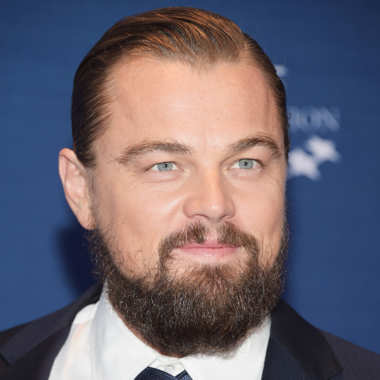

Task ID 51 operation: perform_retrieval with retriever 1 and max_results 20
Results
Rank 1, region


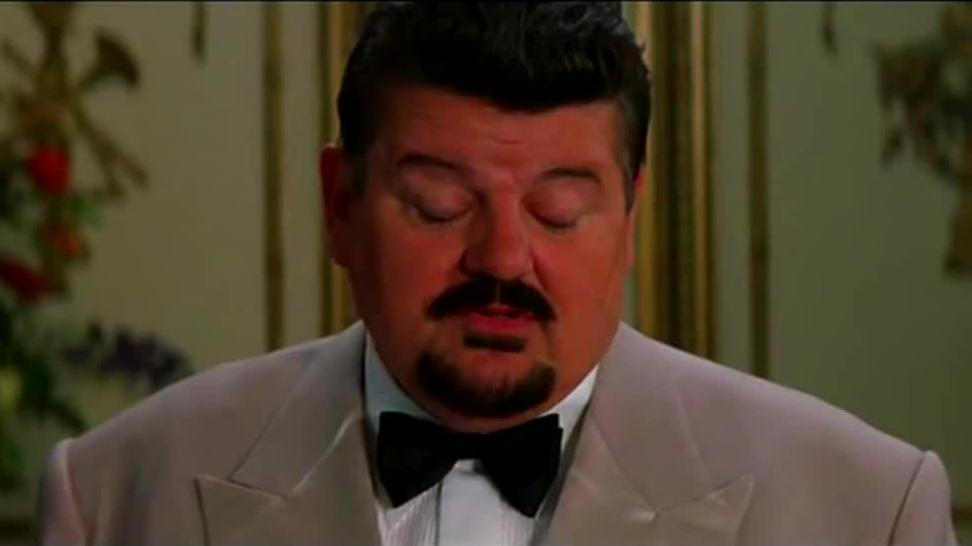

Rank 2, region


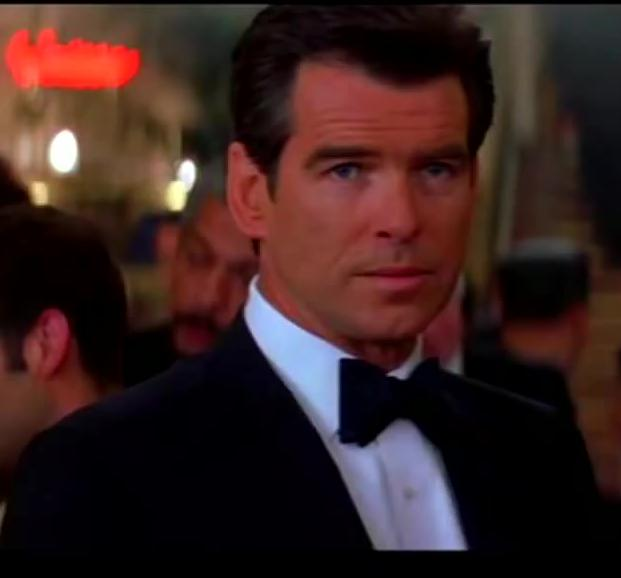

Rank 3, region


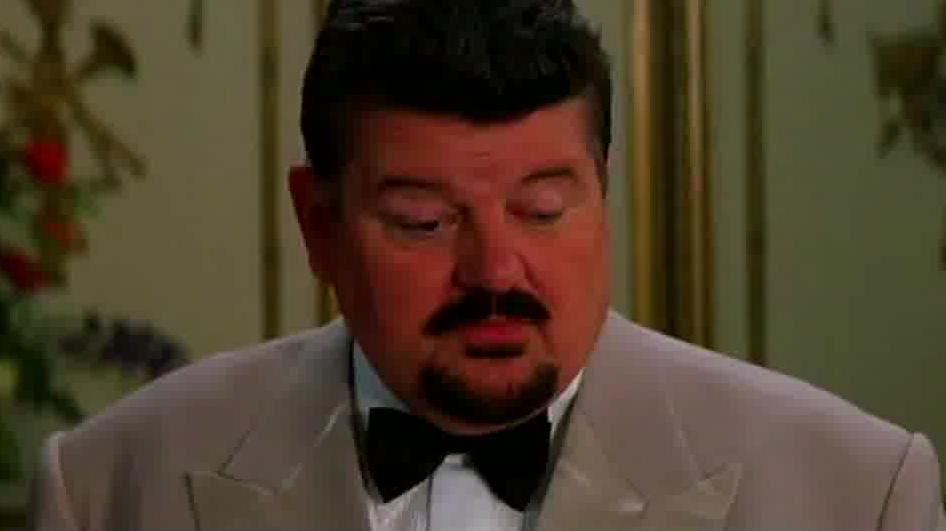

Rank 4, region


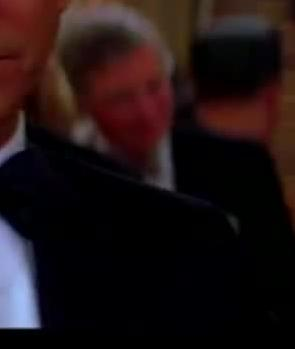

Rank 5, region


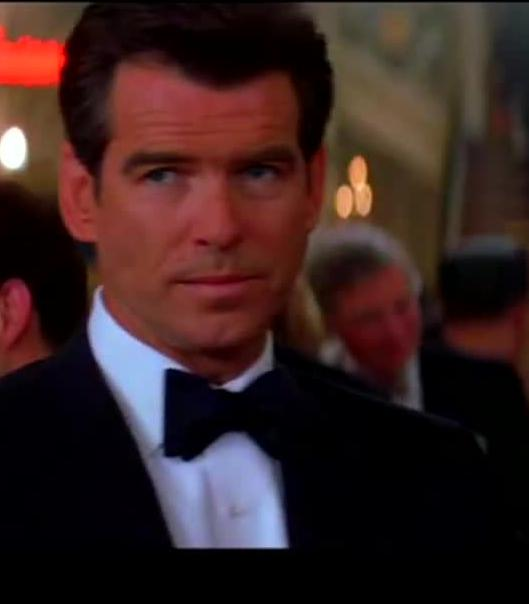

Rank 6, region


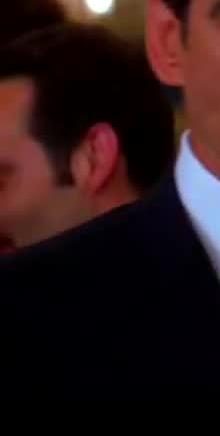

Rank 7, full frame


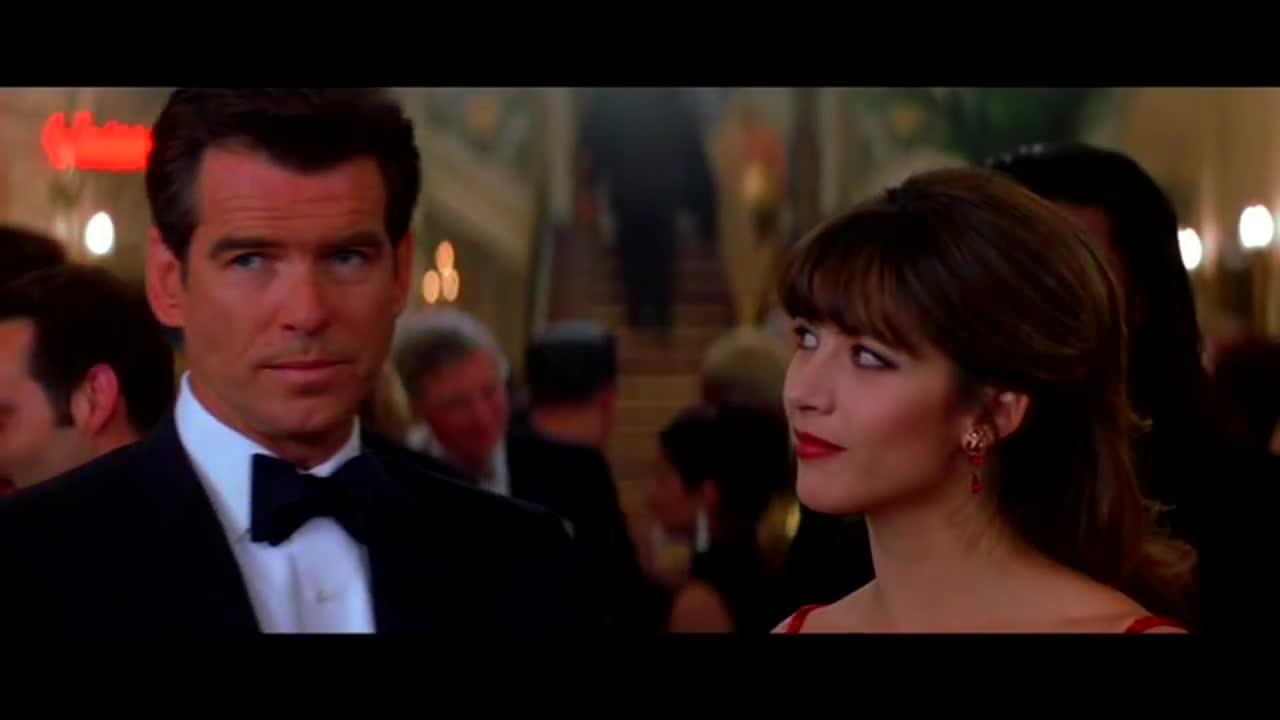

Rank 8, full frame


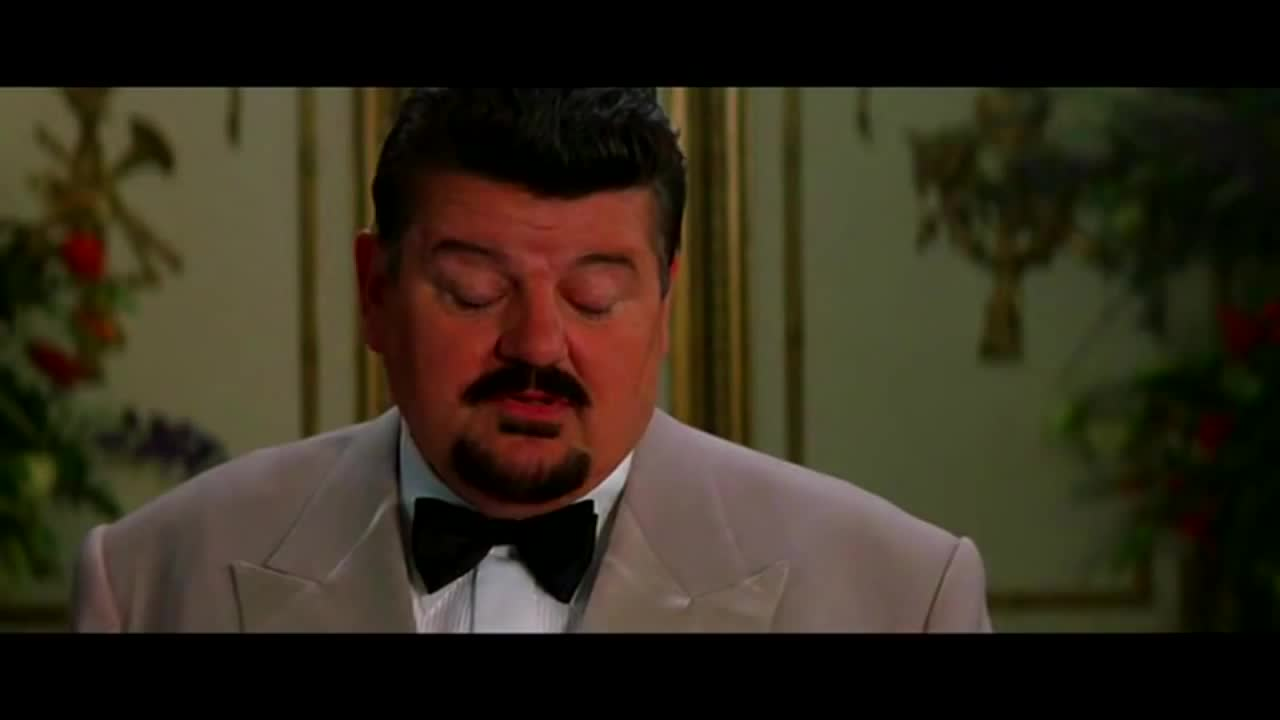

Rank 9, region


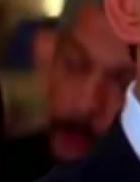

Rank 10, full frame


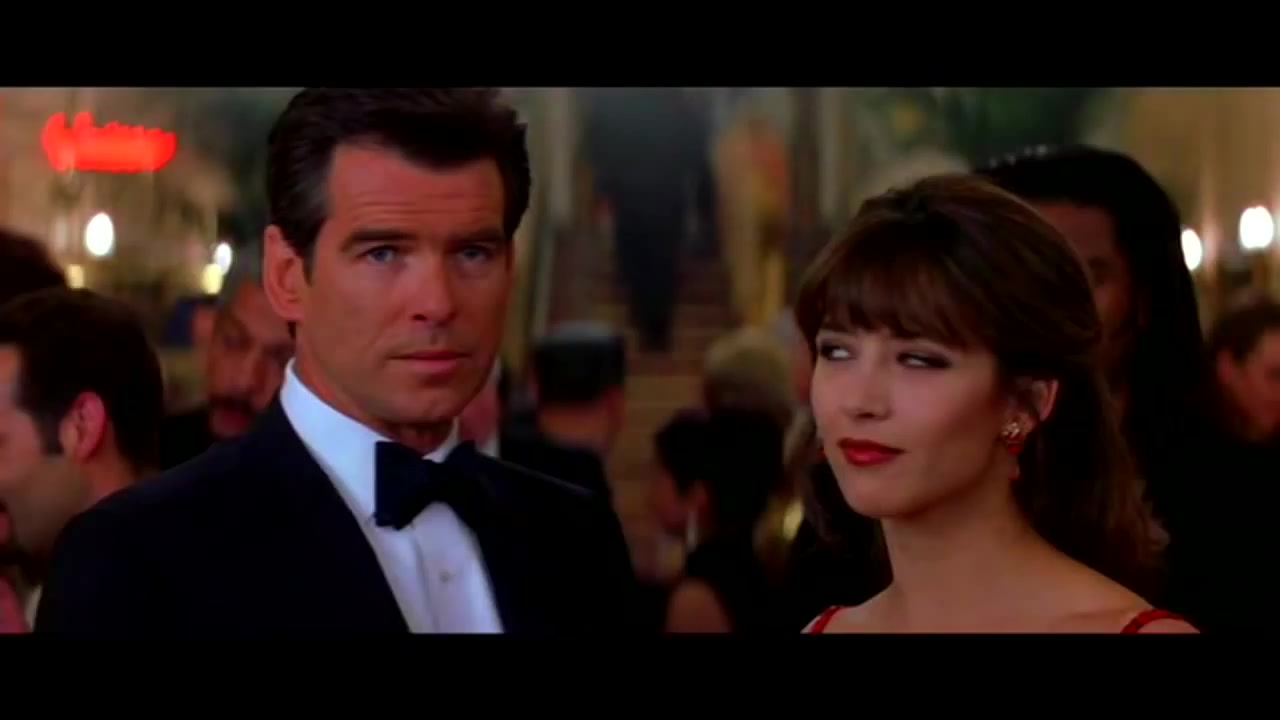

Rank 11, region


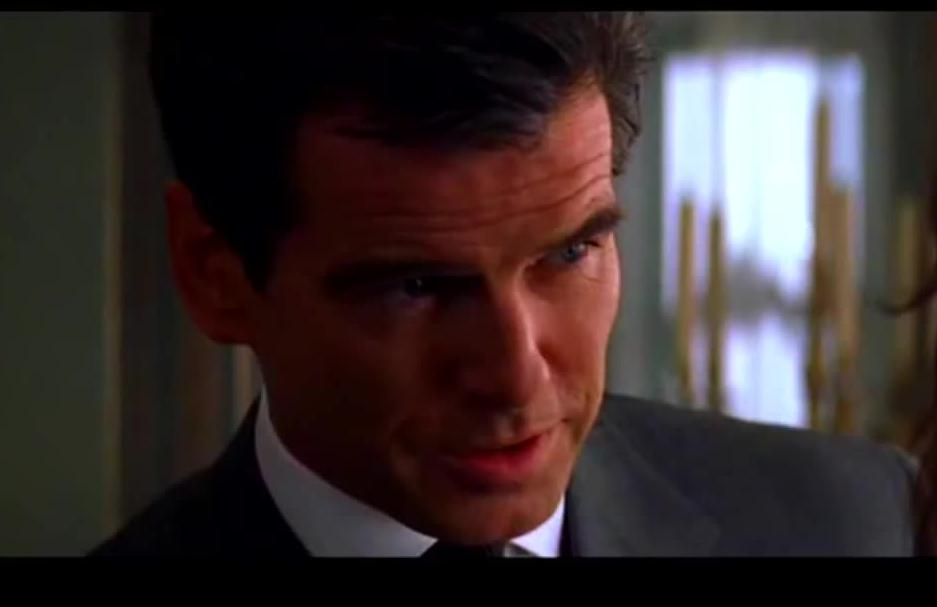

Rank 12, full frame


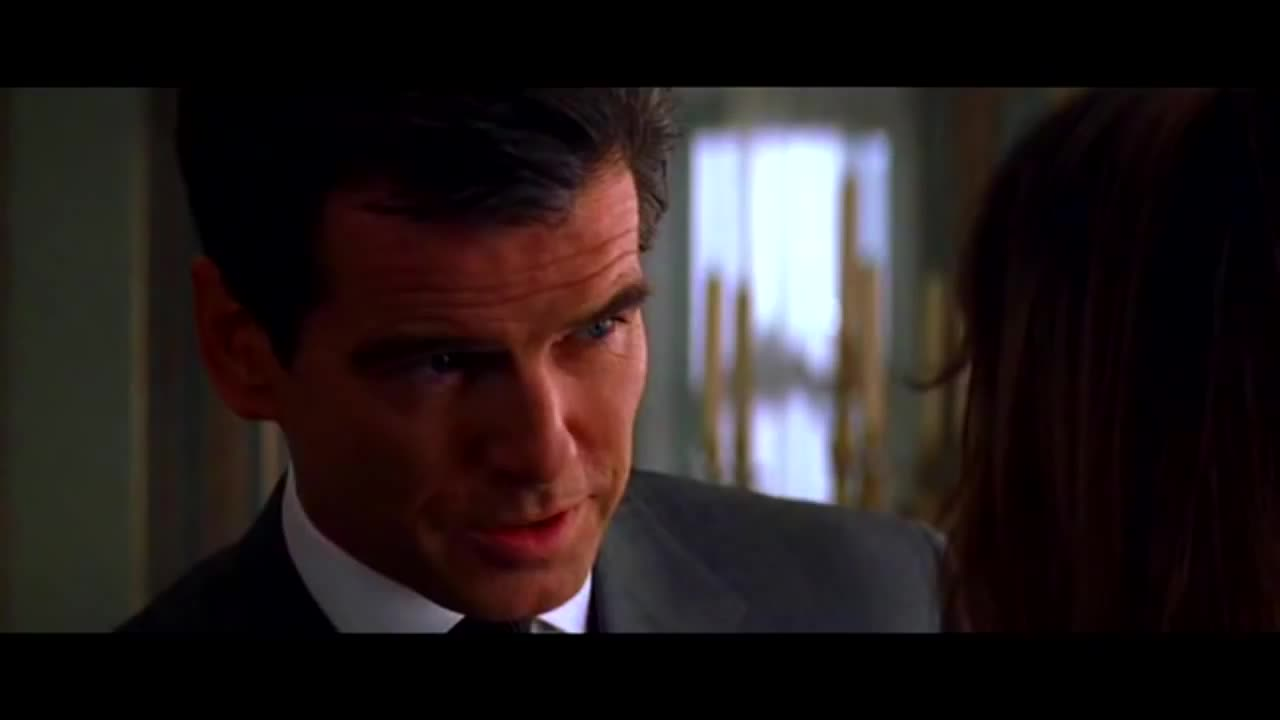

Rank 13, region


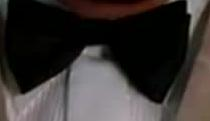

Rank 14, region


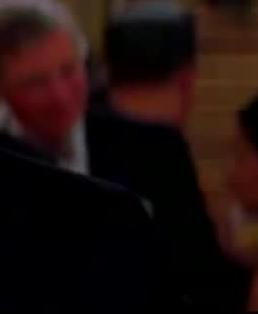

Rank 15, region


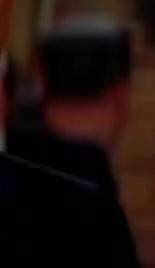

Rank 16, region


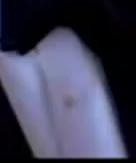

Rank 17, full frame


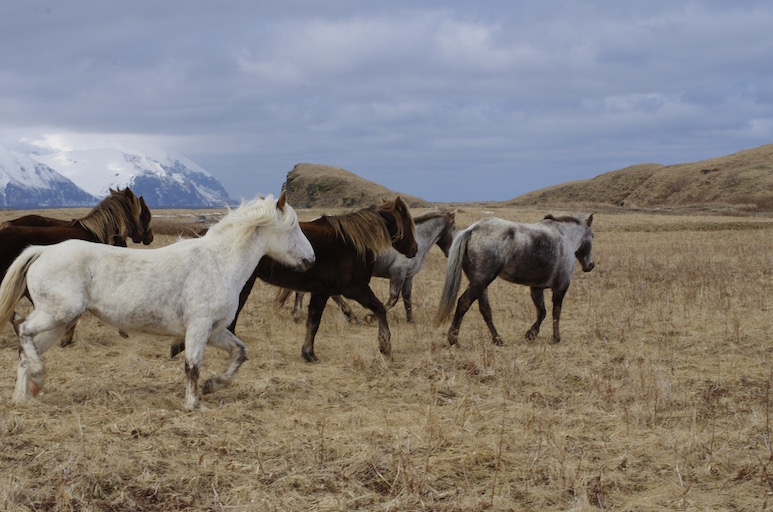

Rank 18, full frame


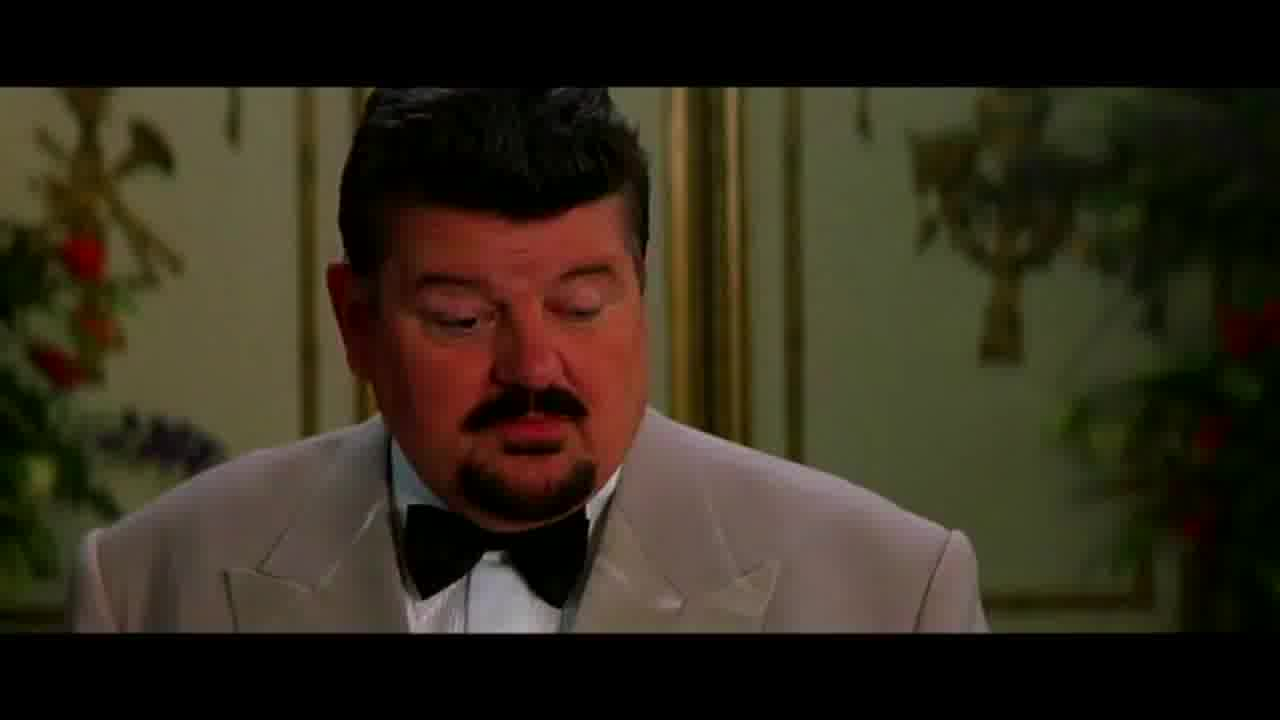

Rank 19, region


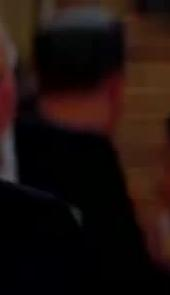

Rank 20, region


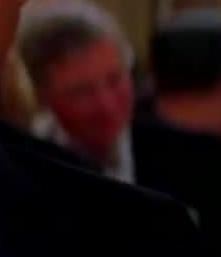

In [13]:
for r in q.search_results:
    r.visualize()

Query Image


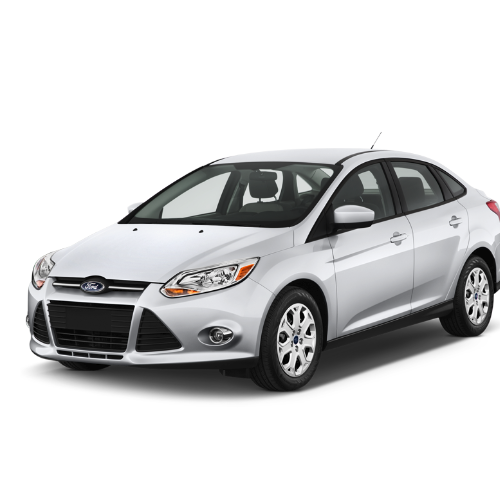

Task ID 54 operation: perform_retrieval with retriever 1 and max_results 20
Results
Rank 1, region


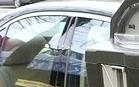

Rank 2, region


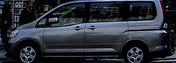

Rank 3, region


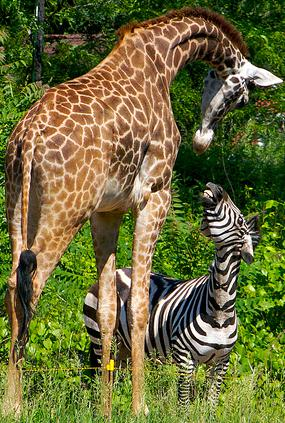

Rank 4, full frame


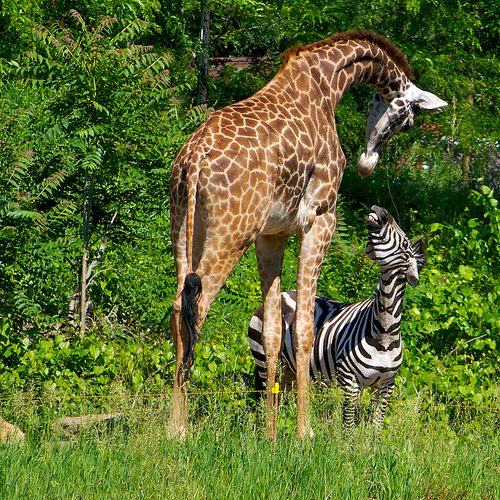

Rank 5, region


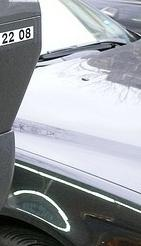

Rank 6, region


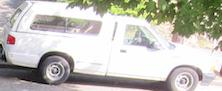

Rank 7, full frame


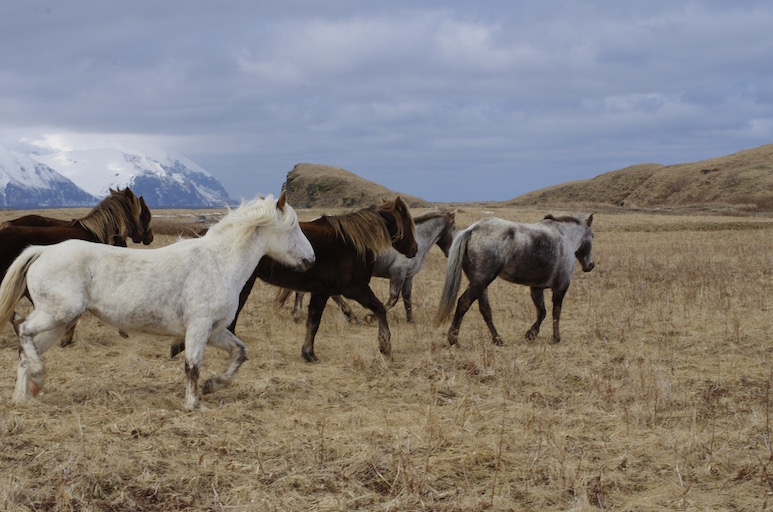

Rank 8, region


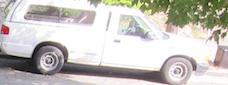

Rank 9, region


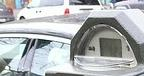

Rank 10, region


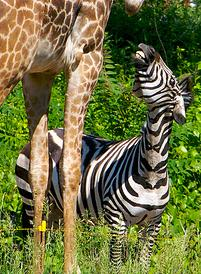

Rank 11, region


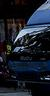

Rank 12, region


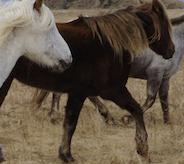

Rank 13, region


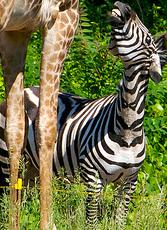

Rank 14, region


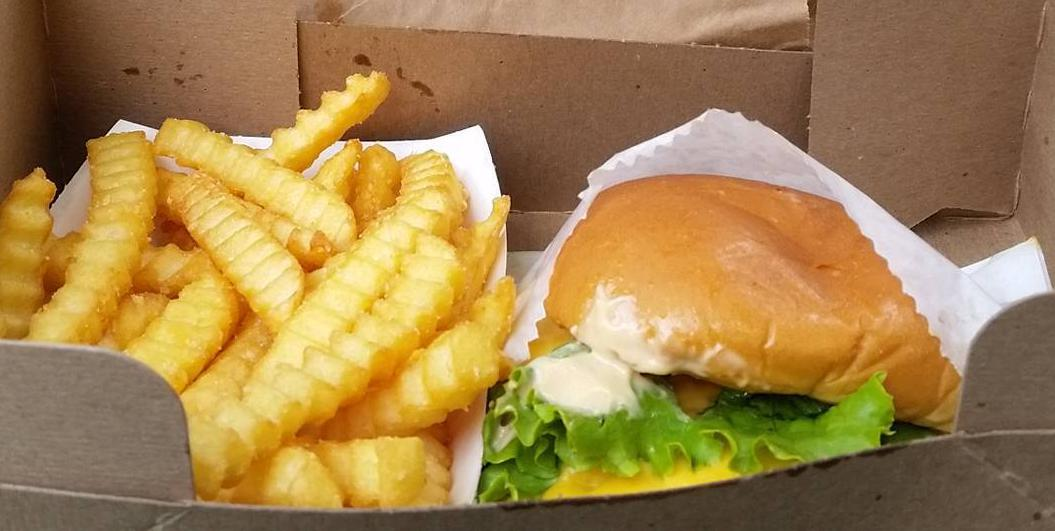

Rank 15, region


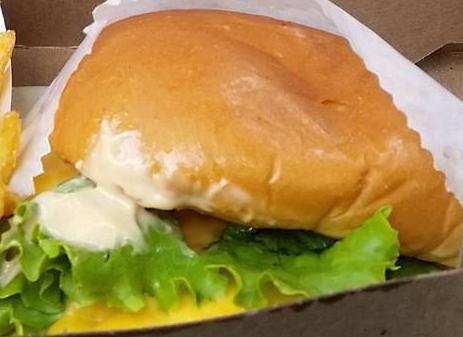

Rank 16, region


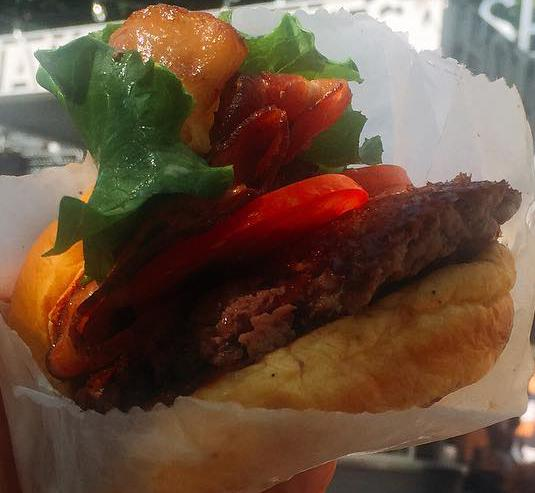

Rank 17, full frame


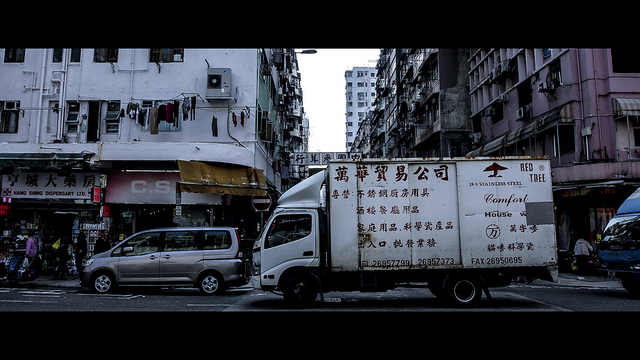

Rank 18, region


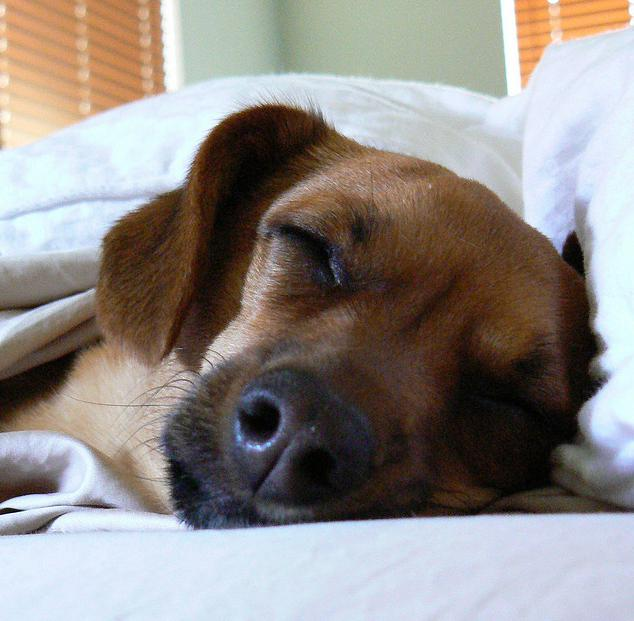

Rank 19, region


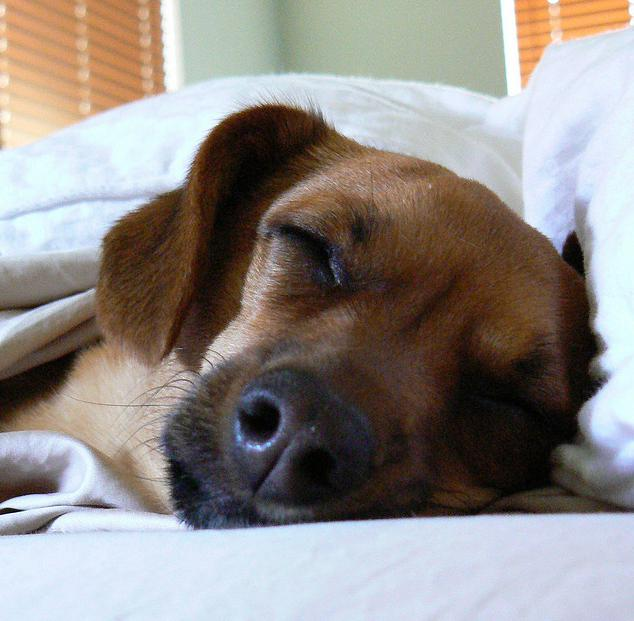

Rank 20, region


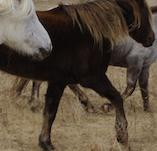

In [14]:
q = dvaclient.query.FindSimilarImages('tests/queries/query_car.png',indexer_pk=inception_indexer_pk,retriever_pk=inception_retriever_pk)
q.execute(context=ctx)
q.wait()
q.gather_search_results()
for r in q.search_results:
    r.visualize()